In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [7]:
fs=14
plt.rc("font",size=fs)

In [15]:
series = pd.read_csv("/Volumes/Baby-Orange/XPIA-NCAR/processed/model_level_k_for_z_zi_0.5.csv",index_col=[0],header=None,parse_dates=True)

In [5]:
series.head()

,1
0,
2015-03-20 14:00:00,7
2015-03-20 14:10:00,3
2015-03-20 14:20:00,4
2015-03-20 14:30:00,4
2015-03-20 14:40:00,6


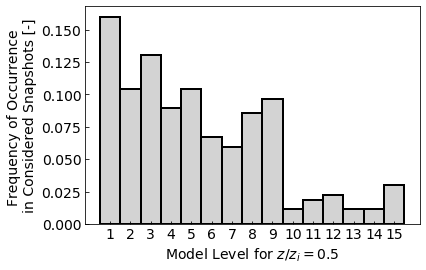

In [8]:
fig = plt.figure()
ax  = fig.add_subplot(111)
a=ax.hist(series.values, density=True, bins=np.arange(0.5,16.5,1), ec='k', fc='lightgrey', lw=2)
ax.set_xticks(np.arange(1,16,1))
ax.set_xlabel("Model Level for $z/z_i=0.5$")
ax.set_ylabel("Frequency of Occurrence \nin Considered Snapshots [-]")
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')   
# fig.savefig("../figs/k_for_z_zi_0.5.png",dpi=250,bbox_inches="tight")

In [9]:
days = [20,21,28,29,30]

In [10]:
colors_days = {20:'#ABB2B9',
               21:'#5DADE2',
               28:'#16A085',
               29:'#D4AC0D',
               30:'#A569BD'}

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

IndexError: index 0 is out of bounds for axis 0 with size 0

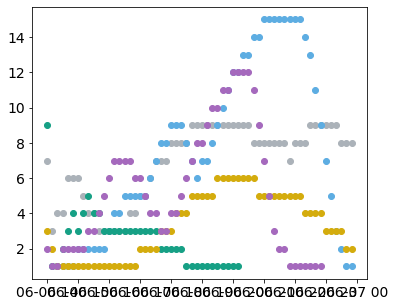

In [21]:
hours_to_tick = np.arange(14,24,1)

start = pd.Timestamp('20180606')

fig = plt.figure(figsize=(6,5))
ax  = fig.add_subplot(111)

iday = 0
for day in days:
    
    tmp    = series.loc['2015-03-{0}'.format(day)].copy()
    idxref = pd.Timestamp(tmp.index.year[0], tmp.index.month[0], tmp.index.day[0], 14, 0)
    deltas = tmp.index - idxref + pd.Timedelta('14h')
    index  = start+deltas
    
    ax.plot(index,
            tmp.values,color=colors_days[day],linestyle='-',lw=0,marker='o',
            label='March {0}'.format(day))


indices_to_tick = [np.where(index.hour==h)[0][0] for h in hours_to_tick][1:]
xticks = [index[i] for i in indices_to_tick]
xticks.append(pd.Timestamp(start+pd.Timedelta('24h')))
xticks.append(pd.Timestamp(start+pd.Timedelta('14h')))
xticks = np.sort(xticks)
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(["14:00\n(08:00 LT)","","16:00","","18:00","","20:00","","22:00","","24:00\n(18:00 LT)"])
ax.set_xlim([xticks[0],xticks[-1]])

# ax.set_xlabel("Time of day [UTC]")

# ax.grid(color='lightgray',linestyle=':')

# ylab       = "Parameterization Scaling\n$P_L$ or $P_{NL}$ [-]"
# ax.set_ylabel(ylab)

# ax.set_ylim([0,1])

# lines  = []
# labels = []

# for day in days:
#     lines.append(Line2D([0], [0], color=colors_days[day], linewidth=0, marker='s', ms=8, mec='k',mew=1))
#     labels.append('03/{0}'.format(day))
    
# lines.append(Line2D([0], [0], color='k', linewidth=3, marker=None, linestyle='-'))
# labels.append('$P_L$')    

# lines.append(Line2D([0], [0], color='k', linewidth=3, marker=None, linestyle='--'))
# labels.append('$P_{{NL}}$')    

# lg = plt.legend(lines,labels,ncol=2,fontsize=12,framealpha=0.2)
# fig.subplots_adjust(left=0.25,bottom=0.2,right=0.88)
# fig.savefig("../figs/P_L_P_NL_diurnal_cycles.png",dpi=300,bbox_inches="tight")

In [25]:
series.loc['2015-03-21 19:50']

1    11
Name: 2015-03-21 19:50:00, dtype: int64